In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo

# Arctic

In [14]:
HEMISPHERE = 'NH'  # 'NH' for Northern Hemisphere, 'SH' for Southern Hemisphere
DATE = '1974-02-01'
ITP_DIR = 'C:/Users/emilt/Documents/Noter/N5_ESMR/N5ESMR_processing/tests_etc/ITP'
MAIN_DIR = 'D:/N5ESMR/N5ESMR_out'
UPDATE_DIR = 'C:/Users/emilt/Documents/Noter/N5_ESMR/N5ESMR_processing/outputs/LDTP'
MIN_POINTS = 7
R_SD_THRESH = 3.737038
FORGET_TIME = 180
ITP_LIMITS = (205.0, 255.0)

In [15]:
HS_dir = os.path.join(MAIN_DIR, 'ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_LDTPcorrected_'+HEMISPHERE+'-fv1.1')
date_constrained = DATE.replace('-', '')
ds = xr.open_dataset(os.path.join(HS_dir, f'ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_LDTPcorrected_{HEMISPHERE}-{date_constrained}-fv1.1.nc'))

ITP = np.load(os.path.join(ITP_DIR, f'LDTP_{HEMISPHERE}_{DATE}.npy'))
rSD = np.load(os.path.join(UPDATE_DIR, 'rSD', f'rSD_{HEMISPHERE}_{DATE}.npy'))
rN = np.load(os.path.join(UPDATE_DIR, 'rNPoints', f'rNPoints_{HEMISPHERE}_{DATE}.npy'))
rMean = np.load(os.path.join(UPDATE_DIR, 'rMean', f'rMean_{HEMISPHERE}_{DATE}.npy'))

Tb = ds['Tb_corr'].values.squeeze()
SIC = ds['ice_conc'].values.squeeze()
err = ds['total_standard_error'].values.squeeze()
lat = ds['lat'].values
lon = ds['lon'].values
flag = ds['status_flag'].values.squeeze()


err[flag>0] = 0
update = (rSD < R_SD_THRESH) & (rN >= MIN_POINTS) & (rMean >= ITP_LIMITS[0]) & (rMean <= ITP_LIMITS[1])

Tb[np.isnan(SIC)] = np.nan
err[np.isnan(SIC)] = np.nan
update[np.isnan(SIC)] = False
ITP[np.isnan(SIC)] = np.nan
rSD[np.isnan(SIC)] = np.nan

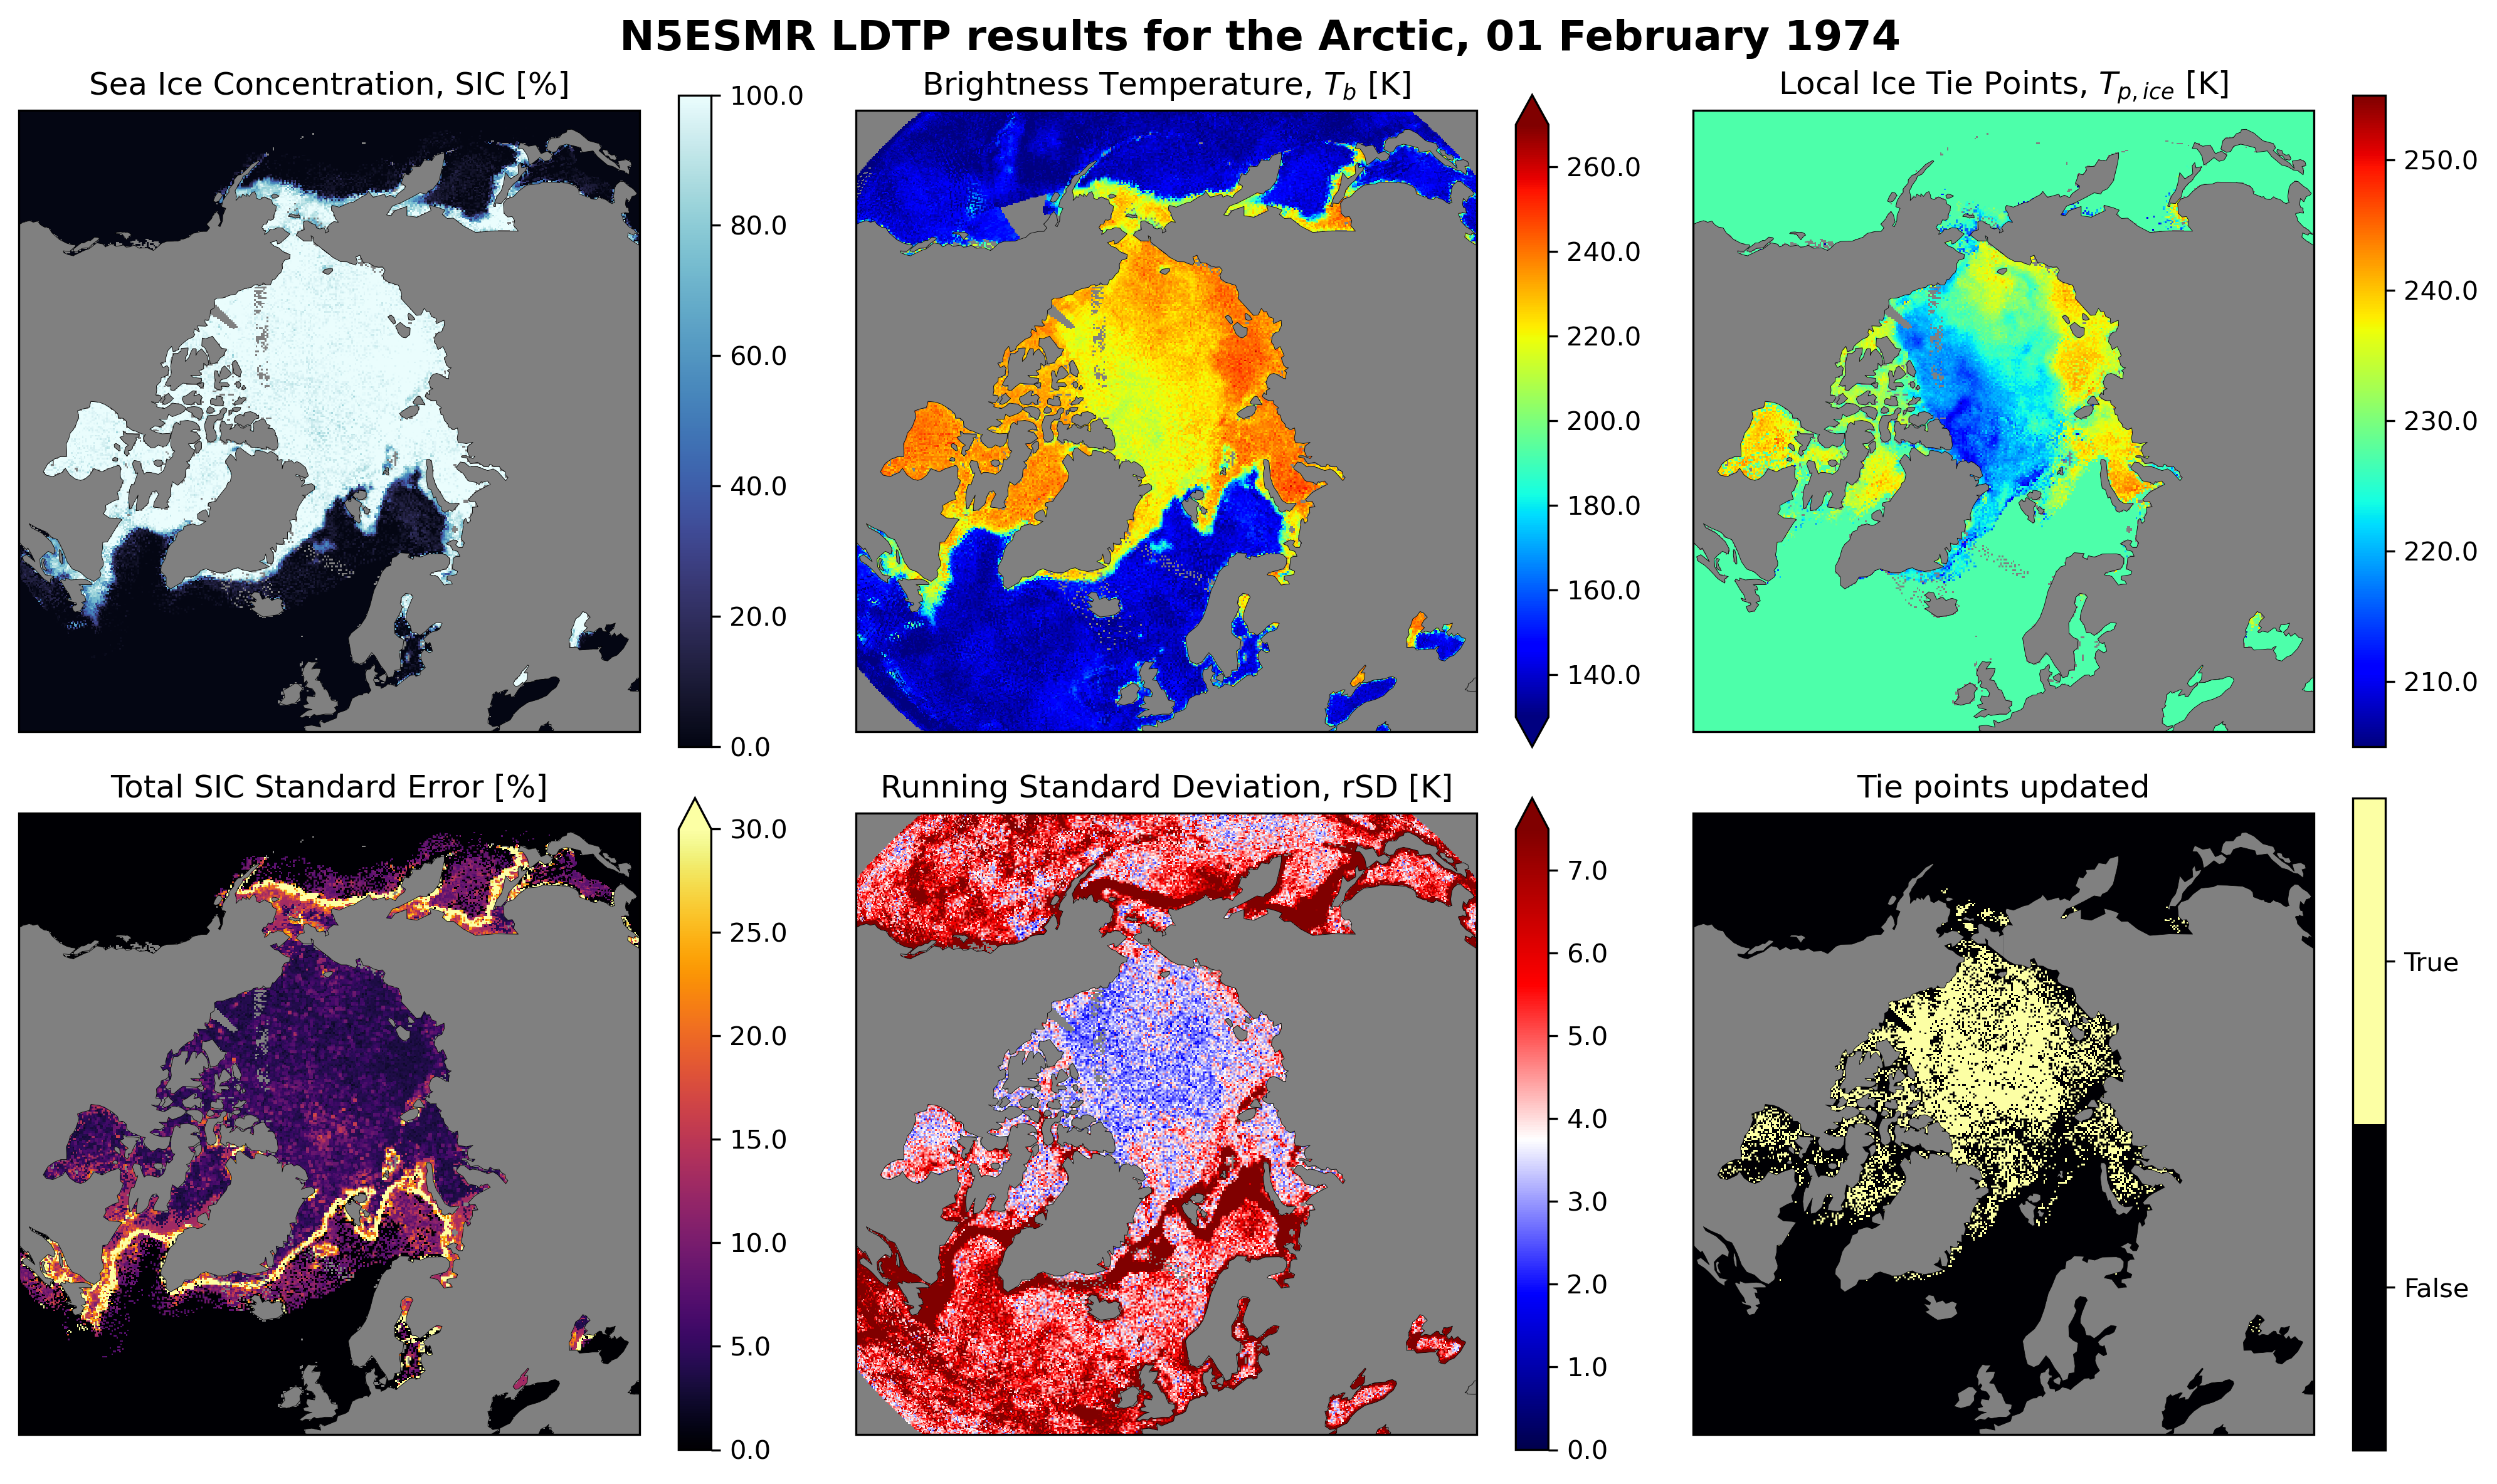

In [16]:
from matplotlib.colors import ListedColormap
import matplotlib

# Get start and end colors from Inferno colormap
inferno = matplotlib.colormaps['inferno']
start_color = inferno(0.0)
end_color = inferno(1.0)
binary_cmap = ListedColormap([start_color, end_color])

# defining reference frame
if HEMISPHERE == 'NH':
    proj = ccrs.Orthographic(0,90)
    _crs = ccrs.NorthPolarStereo(central_longitude=0)
    scale = 5000000
    name = 'Arctic'
elif HEMISPHERE == 'SH':
    proj = ccrs.Orthographic(0,-90)
    _crs = ccrs.SouthPolarStereo()
    scale = 5000000
    name = 'Antarctic'

land = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                        edgecolor='none',
                                        facecolor=np.array([0.5,0.5,0.5]))


fig, ax = plt.subplots(2,3,figsize=(13.5, 8),layout='tight', subplot_kw={'projection': proj},dpi=300)
im = ax[0,0].pcolormesh(lon,lat, SIC, vmin=0,vmax=100, transform=ccrs.PlateCarree(), cmap=cmo.ice)
fig.colorbar(im,format='%.1f')
ax[0,0].set_title('Sea Ice Concentration, SIC [%]')
im = ax[0,1].pcolormesh(lon,lat, Tb, vmin=130,vmax=270, transform=ccrs.PlateCarree(), cmap='jet')
fig.colorbar(im,format='%.1f',extend='both')
ax[0,1].set_title('Brightness Temperature, $T_b$ [K]')

im = ax[0,2].pcolormesh(lon,lat, ITP, vmin=205,vmax=255, transform=ccrs.PlateCarree(), cmap='jet')
fig.colorbar(im,format='%.1f')
ax[0,2].set_title('Local Ice Tie Points, $T_{p,ice}$ [K]')

im = ax[1,0].pcolormesh(lon,lat, err, vmin=0,vmax=30, transform=ccrs.PlateCarree(), cmap='inferno')
fig.colorbar(im,format='%.1f',extend='max')
ax[1,0].set_title('Total SIC Standard Error [%]')

im = ax[1,1].pcolormesh(lon,lat, rSD, vmin=0, vmax = 7.5, transform=ccrs.PlateCarree(), cmap='seismic')
fig.colorbar(im,format='%.1f',extend='max')
ax[1,1].set_title('Running Standard Deviation, rSD [K]')

im = ax[1,2].pcolormesh(lon,lat, update, vmin=0, vmax = 1, transform=ccrs.PlateCarree(), cmap=binary_cmap)
cbar = fig.colorbar(im, ticks=[0.25, 0.75])
cbar.ax.set_yticklabels(['False', 'True'])
ax[1,2].set_title('Tie points updated')

for axs in ax.ravel():
    axs.add_feature(land)
    axs.coastlines(resolution='110m', color='black', linewidth=0.2)
    axs.set_facecolor("gray")
    axs.set_extent((-scale, scale, -scale, scale), crs=_crs)
    #gls = axs.gridlines(alpha=0.2,lw=1,ls=':',draw_labels=True, dms=True, x_inline=False, y_inline=True,color='red', ylabel_style=dict(color='red'),rotate_labels=False  ,ylocs=[60,70,80])
fig.suptitle('N5ESMR LDTP results for the '+name+', ' + '01 February 1974', fontsize=16, fontweight='bold')
plt.show()

# Antarctic

In [17]:
HEMISPHERE = 'SH'#'NH'  # 'NH' for Northern Hemisphere, 'SH' for Southern Hemisphere
DATE = '1974-09-01'
ITP_DIR = 'C:/Users/emilt/Documents/Noter/N5_ESMR/N5ESMR_processing/tests_etc/ITP'
MAIN_DIR = 'D:/N5ESMR/N5ESMR_out'
UPDATE_DIR = 'C:/Users/emilt/Documents/Noter/N5_ESMR/N5ESMR_processing/outputs/LDTP'
MIN_POINTS = 7
R_SD_THRESH = 3.737038
FORGET_TIME = 180
ITP_LIMITS = (205.0, 255.0)

In [18]:
HS_dir = os.path.join(MAIN_DIR, 'ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_LDTPcorrected_'+HEMISPHERE+'-fv1.1')
date_constrained = DATE.replace('-', '')
ds = xr.open_dataset(os.path.join(HS_dir, f'ESACCI-SEAICE-L3C-SICONC-NIMBUS5_ESMR-EASE2_LDTPcorrected_{HEMISPHERE}-{date_constrained}-fv1.1.nc'))

ITP = np.load(os.path.join(ITP_DIR, f'LDTP_{HEMISPHERE}_{DATE}.npy'))
rSD = np.load(os.path.join(UPDATE_DIR, 'rSD', f'rSD_{HEMISPHERE}_{DATE}.npy'))
rN = np.load(os.path.join(UPDATE_DIR, 'rNPoints', f'rNPoints_{HEMISPHERE}_{DATE}.npy'))
rMean = np.load(os.path.join(UPDATE_DIR, 'rMean', f'rMean_{HEMISPHERE}_{DATE}.npy'))

Tb = ds['Tb_corr'].values.squeeze()
SIC = ds['ice_conc'].values.squeeze()
err = ds['total_standard_error'].values.squeeze()
lat = ds['lat'].values
lon = ds['lon'].values
flag = ds['status_flag'].values.squeeze()


err[flag>0] = 0
update = (rSD < R_SD_THRESH) & (rN >= MIN_POINTS) & (rMean >= ITP_LIMITS[0]) & (rMean <= ITP_LIMITS[1])

Tb[np.isnan(SIC)] = np.nan
err[np.isnan(SIC)] = np.nan
update[np.isnan(SIC)] = False
ITP[np.isnan(SIC)] = np.nan
rSD[np.isnan(SIC)] = np.nan

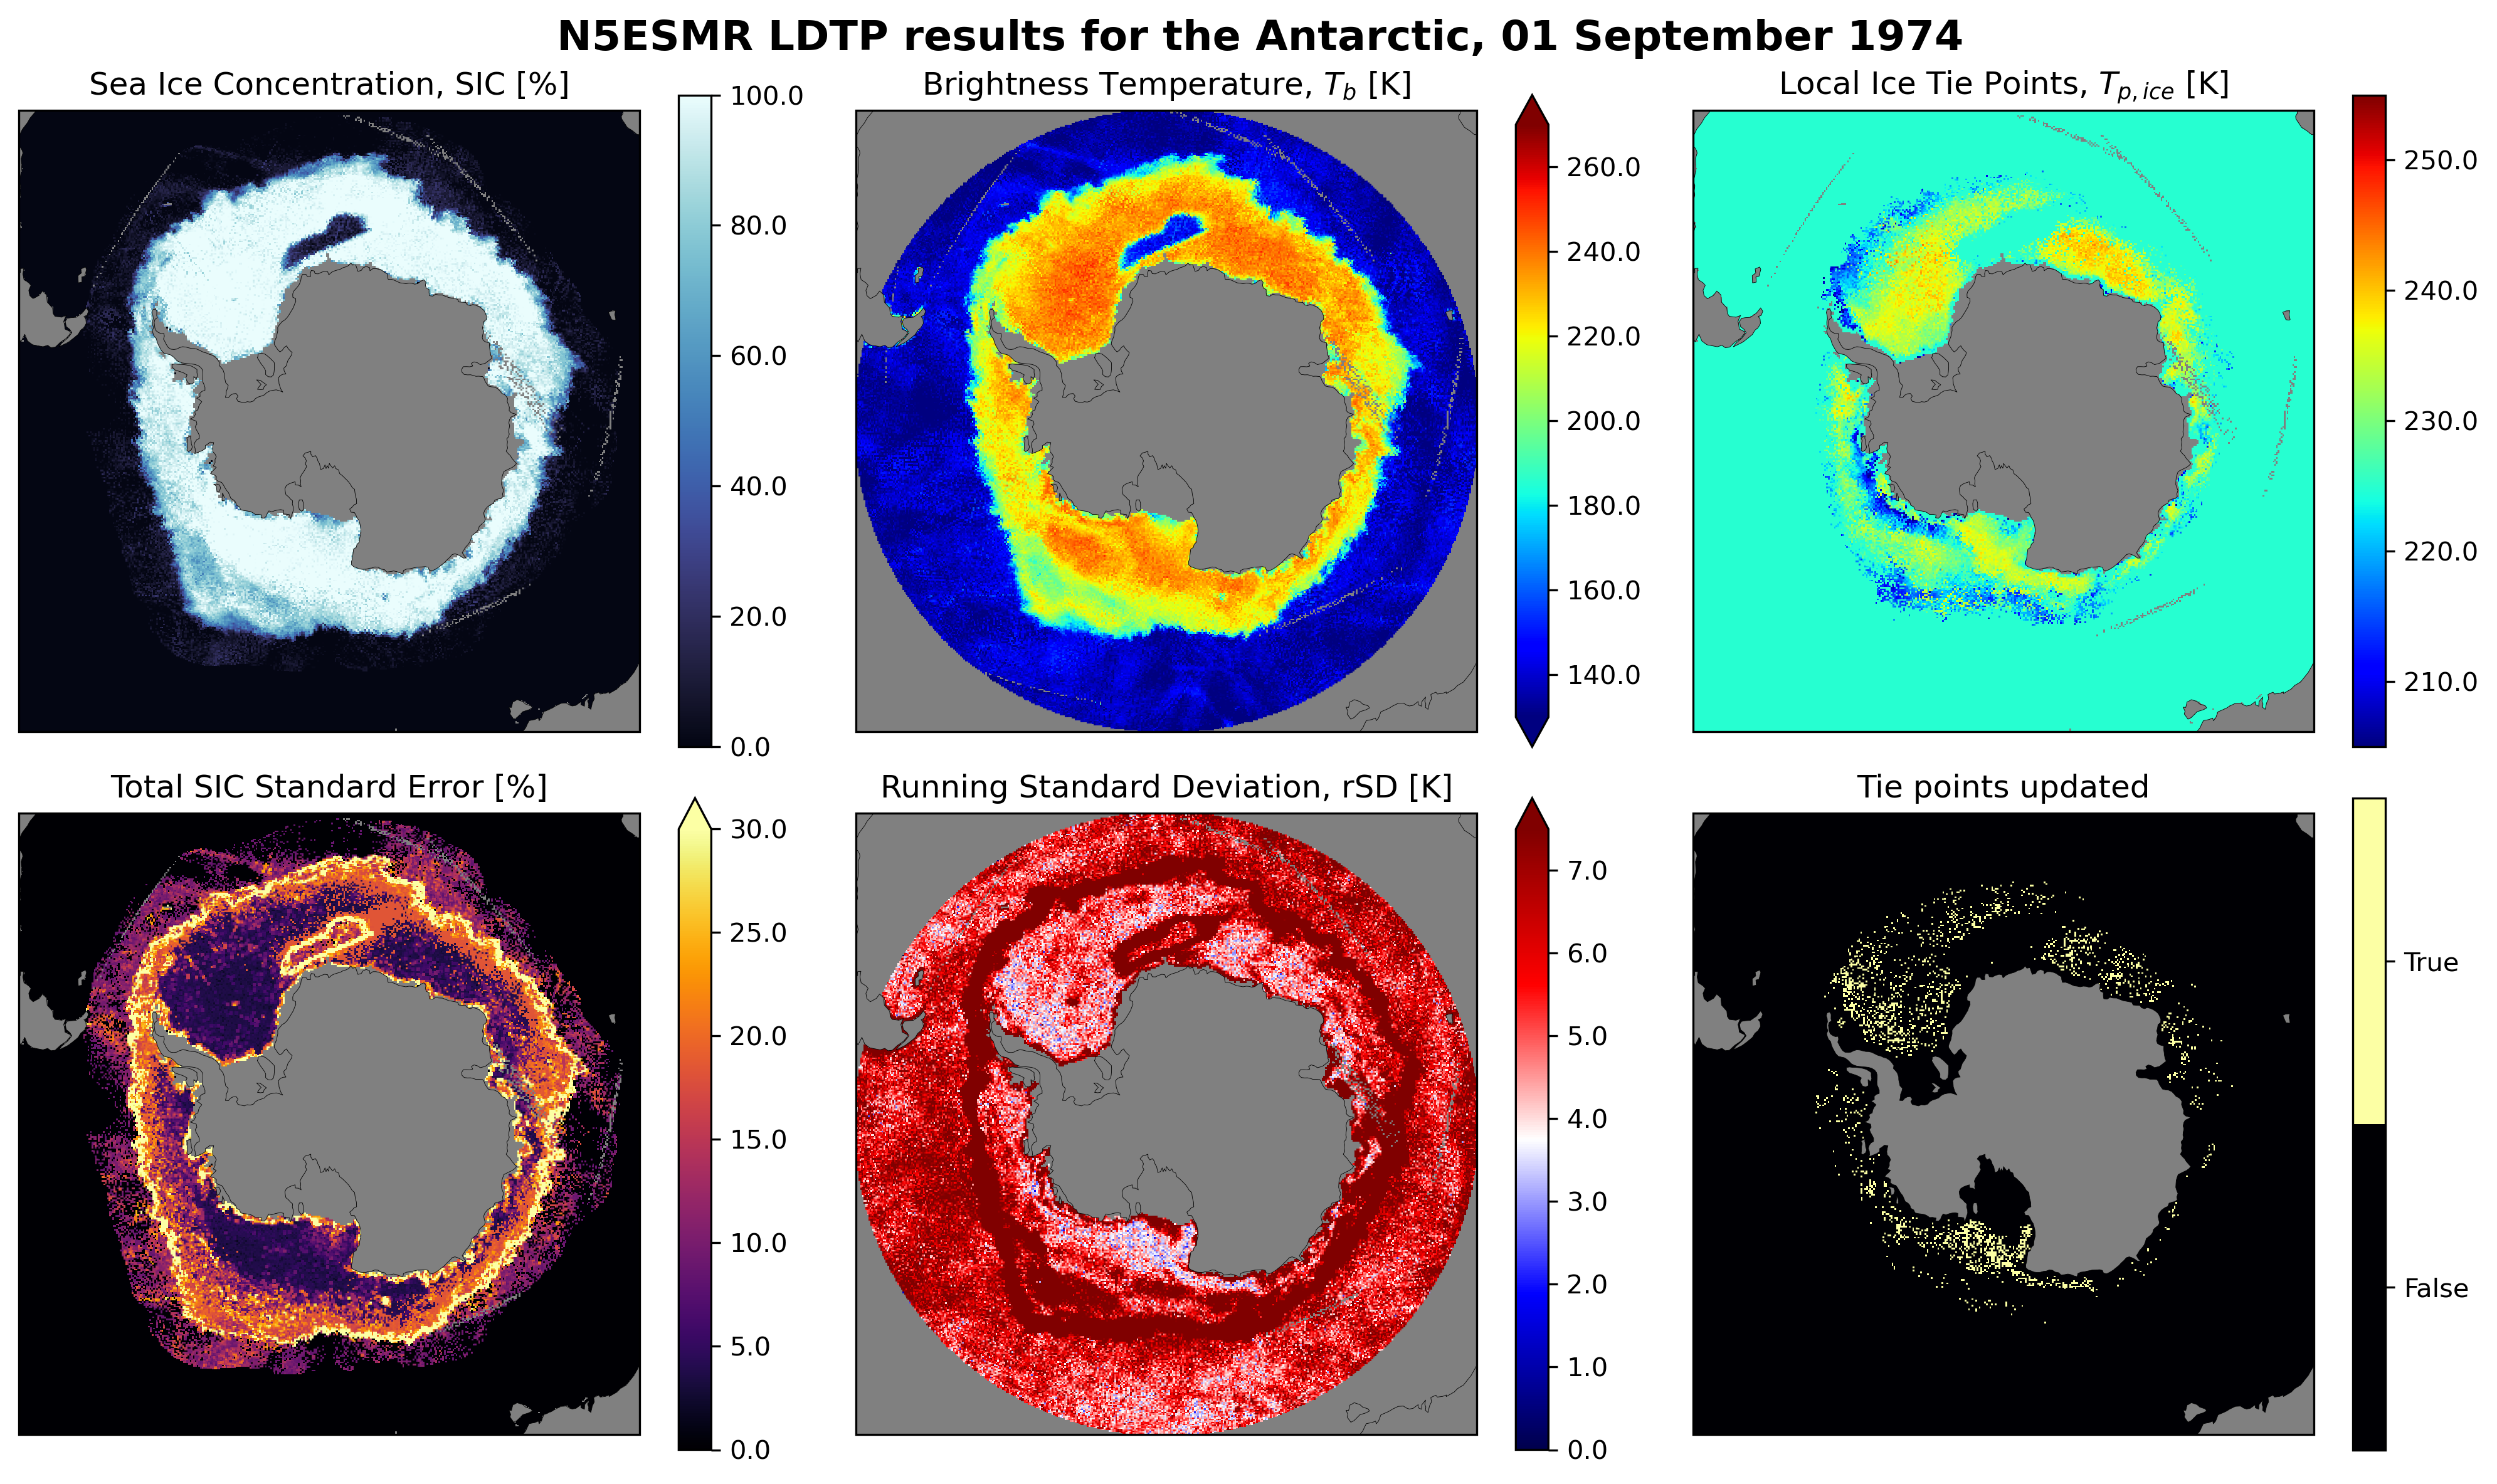

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib

# Get start and end colors from Inferno colormap
inferno = matplotlib.colormaps['inferno']
start_color = inferno(0.0)
end_color = inferno(1.0)
binary_cmap = ListedColormap([start_color, end_color])

# defining reference frame
if HEMISPHERE == 'NH':
    proj = ccrs.Orthographic(0,90)
    _crs = ccrs.NorthPolarStereo(central_longitude=0)
    scale = 5000000
    name = 'Arctic'
elif HEMISPHERE == 'SH':
    proj = ccrs.Orthographic(0,-90)
    _crs = ccrs.SouthPolarStereo()
    scale = 5000000
    name = 'Antarctic'

land = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                        edgecolor='none',
                                        facecolor=np.array([0.5,0.5,0.5]))


fig, ax = plt.subplots(2,3,figsize=(13.5, 8),layout='tight', subplot_kw={'projection': proj},dpi=300)
im = ax[0,0].pcolormesh(lon,lat, SIC, vmin=0,vmax=100, transform=ccrs.PlateCarree(), cmap=cmo.ice)
fig.colorbar(im,format='%.1f')
ax[0,0].set_title('Sea Ice Concentration, SIC [%]')
im = ax[0,1].pcolormesh(lon,lat, Tb, vmin=130,vmax=270, transform=ccrs.PlateCarree(), cmap='jet')
fig.colorbar(im,format='%.1f',extend='both')
ax[0,1].set_title('Brightness Temperature, $T_b$ [K]')

im = ax[0,2].pcolormesh(lon,lat, ITP, vmin=205,vmax=255, transform=ccrs.PlateCarree(), cmap='jet')
fig.colorbar(im,format='%.1f')
ax[0,2].set_title('Local Ice Tie Points, $T_{p,ice}$ [K]')

im = ax[1,0].pcolormesh(lon,lat, err, vmin=0,vmax=30, transform=ccrs.PlateCarree(), cmap='inferno')
fig.colorbar(im,format='%.1f',extend='max')
ax[1,0].set_title('Total SIC Standard Error [%]')

im = ax[1,1].pcolormesh(lon,lat, rSD, vmin=0, vmax = 7.5, transform=ccrs.PlateCarree(), cmap='seismic')
fig.colorbar(im,format='%.1f',extend='max')
ax[1,1].set_title('Running Standard Deviation, rSD [K]')

im = ax[1,2].pcolormesh(lon,lat, update, vmin=0, vmax = 1, transform=ccrs.PlateCarree(), cmap=binary_cmap)
cbar = fig.colorbar(im, ticks=[0.25, 0.75])
cbar.ax.set_yticklabels(['False', 'True'])
ax[1,2].set_title('Tie points updated')

for axs in ax.ravel():
    axs.add_feature(land)
    axs.coastlines(resolution='110m', color='black', linewidth=0.2)
    axs.set_facecolor("gray")
    axs.set_extent((-scale, scale, -scale, scale), crs=_crs)
    #gls = axs.gridlines(alpha=0.2,lw=1,ls=':',draw_labels=True, dms=True, x_inline=False, y_inline=True,color='red', ylabel_style=dict(color='red'),rotate_labels=False  ,ylocs=[60,70,80])
fig.suptitle('N5ESMR LDTP results for the '+name+', ' + '01 September 1974', fontsize=16, fontweight='bold')
plt.show()